<a href="https://colab.research.google.com/github/Shradhs1802/Projects/blob/main/Titanic_Data_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#         **Prediction of Survival of persons aboard the Titanic using Machine Learning Algorithms**

# **Problem Statement**
We have the Titanic Dataset which is divided into the train and test dataset.

The train dataset contains information about 891 passengers and also whether they survived or not (i.e. our Target Variable).

The test dataset contains information about 418 passengers, but it does not contain the target variable, i.e. whether they survived or not.
We have to find patterns in the training data and predict whether the other 418 passengers onboard survived or not. 


# Let us first import the necessary libraries

In [317]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Lets load the train and test datasets

In [318]:
# load the train and test dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (3).csv


In [319]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (3).csv


In [320]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [321]:
# Lets check the train dataset

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [322]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Exploratory Data Analysis**

In [323]:
# Lets check the shape of train dataset
train.shape

(891, 12)

We can see there are 891 rows representing passenger samples and 12 colums including 11 features and one target column "Survived" which tells whether the person survived or not.

In [324]:
# lets check the column names
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [325]:
# Lets check the information of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that:

int64: It represents the integer variables. PassengerID, Survived, Pclass, SibSp and Parch in our data set are int variables.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: Age and Fare.

object: Object format means variables are categorical. Categorical variables in our dataset are: Name, Sex, Ticket, Cabin and Embarked.

Pclass is ordinal.

In [326]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Emanuel, Miss. Virginia Ethel",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [327]:
# To find unique values in each class
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [328]:
#Lets check for null values in the train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#The column names are:

PassengerID - ID of Passengers travelling. There are 891 unique IDs.

Survived - Tells whether the passenger survived or not. It has two unique values, '1' if the passenger survives and '0' if does not survive.

Pclass - Tells the class in which the passenger travels. There are three unique values, '1' for passengers travelling in First Class, '2' for passengers travelling in Second Class and '3' for passengers travelling in Third Class.

Name - The names of passengers. It has 891 unique values.

Sex - The sex of passengers travelling It has two unique values 'Male' and 'Female'.

Age - Tells the age of Passengers. There are 714 values so there is missing data in this column.

SibSp - Tells about if the passenger as alone or had a sibling or a spouse along. There are seven unique values in this column.

Parch - Tells about if the passenger had parents or children along. There are seven unique values in this column.

Ticket - The ticket number of the passengers.

Fare - Tells about the fare each person paid for the ticket.

Cabin - Tells whether the person had a cabin or not on the ship.

Embarked - Tells about where the person boarded the ship. It has three unique values, 'S', 'C', 'Q'.







We can see that there are null values in the following features:

Age - 177

Cabin - 687

Embarked - 2 

#Lets see how many individuals actually survive.

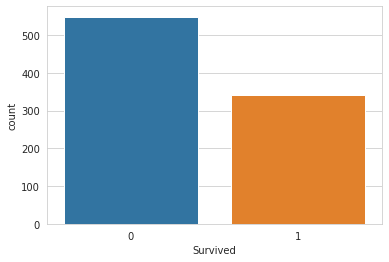

In [329]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

We can see that the number of people who survived is way lesser than those who didn't.

#Lets see how the 'Sex' of the individual affects the Survival Rate.

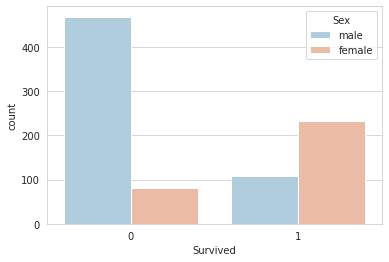

In [330]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

From the above plot, we can infer that the survival chances are more for females than males.

#Lets see how the 'Pclass' in which the individual is travelling, affects the Survival Rate.

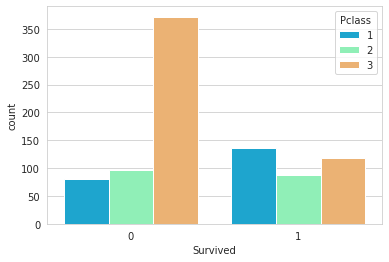

In [331]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

From the above plot, we can infer that:
1. Individuals belonging to 'Pclass' = 1, have higher chances of survival compared to 'Pclass' 2 and 3.

2. Individuals belonging to 'Pclass' = 3, have higher chances of dying compared to 'Pclass' 1 and 3.

#Lets see how the 'Age' of the individual is distributed

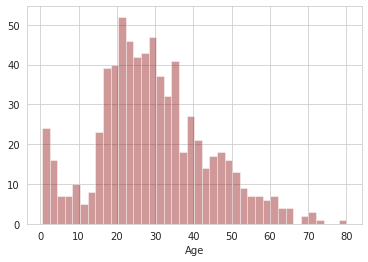

In [332]:
sns.distplot(train['Age'].dropna(),kde=False, color='darkred', bins=40)

Here we have tried to show how ''Age' is distributed. We have dropped 'NaN' values as we saw there were many null values which we will handle later. We can also see that most of the individuals were in the Age group 15-45.  

#Lets see how 'SibSp' column looks

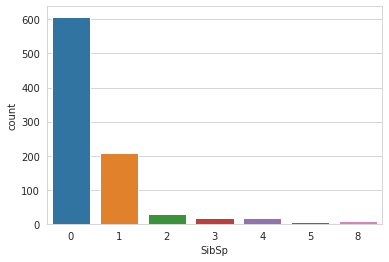

In [333]:
sns.countplot(x='SibSp', data=train)

From the above plot, we can infer that maximun people did not have any sibling or spouse.

#Let us see how the 'Fare' column looks

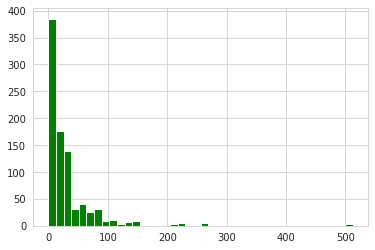

In [334]:
train['Fare'].hist(color='green', bins=40)

From the above plot, we can infer that mean 'Fare' range is around 45-50

# **Data Cleaning**

#Lets fill in the Null values in the Dataset.

To fill in the 'Null' values in the 'Age' column, lets first see how it is related to the 'Pclass' values.

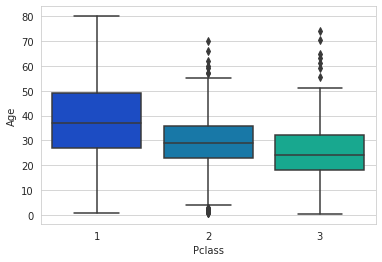

In [335]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

From the above plot we 

In [336]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
            
        else:
            return 24
    else:
        return Age

In [337]:
train["Age"] = train[['Age','Pclass']].apply(impute_age,axis = 1)

In [338]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see from the above table that the null values in the 'Age' column have been successfully filled.

We also see that out of 891 entries in 'Cabin' column, 687 are null values, so lets drop it from the dataset as it will hinder in our analysis.

In [339]:
train.drop('Cabin',axis = 1,inplace = True)

There are two null values in Embarked column, lets handle that too..

In [340]:
train["Embarked"]= train["Embarked"].fillna(train["Embarked"].mode()[0])

In [341]:
# Lets check again for any Null values in our Dataset
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have successfully replaced all the Null values in the Dataset.

We have also seen how 'Age' and 'Sex' columns are correlated with survival.



# Let us now convert the categorical 'Sex' and 'Embarked' columns into Numerical

In [342]:
Sex = pd.get_dummies(train['Sex'])
Embarked = pd.get_dummies(train['Embarked'])

In [343]:
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [344]:
Embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


We have converted the 'Sex' column into two numeric sub columns namely 'Male' and 'Female', as there were two classes of this feature.
WE have converted the 'Embarked' column into three numeric subcolumns namely 'C, Q, S', where 'C' = Cherbourg, 'Q' = Queenstown and 'S' = Southampton, showing the place where the passenger boarded the Ship, denoting the three classes of this feature.

# Let us drop the unnecessary columns like 'Name' and 'Ticket' from the Dataset. 
# Also let us drop 'Sex' and 'Embarked' columns as we have now converted them to numerical form.

In [345]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True) 

In [346]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Lets concatenate the converted 'Sex' and 'Embarked' columns in our Dataset

In [347]:
train = pd.concat([train,Sex,Embarked],axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


As we can see that all the missing values have been filled in the Train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [348]:
# Print the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [349]:
# Checking the test dataset info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [350]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [351]:
# Checking for null values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [352]:
# Dropping the Cabin column as we did in training Dataset
test.drop('Cabin',axis = 1,inplace = True)

In [353]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [354]:
# Impute the missing values by mean calculated on training dataset
test["Age"] = test[['Age','Pclass']].apply(impute_age,axis = 1)

In [355]:
# Filling Fare column with Mode value
test["Fare"]= test["Fare"].fillna(test["Fare"].mode()[0])

In [356]:
# Checking for null values again
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [357]:
# Feature Engineering similar to Training Data
Sex = pd.get_dummies(test['Sex'])
Embarked = pd.get_dummies(test['Embarked'])

In [358]:
test.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True) 

In [359]:
# Checking the converted test dataset 
test = pd.concat([test,Sex,Embarked],axis = 1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


# We have only Numeric values left in our Dataset no. It is now ready for Machine Learning.

Let us separate the Target Feature from the Feature Matrix.

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
# Our Features Matrix
X = train.drop(['Survived'],axis = 1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [362]:
# Target Feature
y = train['Survived'] 
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

As our Dataset is already split into train and test Datasets, let us split it into train and validation datasets.

In [363]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=123)

#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 7)

In [364]:
X_train.shape, X_cv.shape, y_train.shape, y_cv.shape

((712, 11), (179, 11), (712,), (179,))

#Let us apply different Classification Algorithms on our Dataset to check which Algorithm gives best accuracy.

# **Model 1 - Logistic Regression**

In [365]:
from sklearn.linear_model import LogisticRegression

In [366]:
lr = LogisticRegression().fit(X_train,y_train)
y_pred_cv = lr.predict(X_cv)
y_pred_cv

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [367]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc = accuracy_score(y_cv,y_pred_cv)*100
acc = round(acc,2)
print("Accuracy of Logistic Regression Model = ", acc)

Accuracy of Logistic Regression Model =  81.56


#We are getting 81.56% accuracy using Logistic Regression Model

#**Model 2 - Random Forest**

In [368]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_cv = rfc.predict(X_cv)
rfc_accuracy = accuracy_score(y_cv,y_pred_cv)*100
rfc_accuracy = round(rfc_accuracy,2)
print("Accuracy of Random Forest Model on Training Data = ", rfc_accuracy)

Accuracy of Random Forest Model on Training Data =  84.36


# We are getting 84.36% accuracy with Random Forest Model

# **Model 3 - Support Vector Classifier**

In [369]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred_cv = svc.predict(X_cv)
svc_accuracy = accuracy_score(y_cv,y_pred_cv)*100
svc_accuracy = round(svc_accuracy,2)
svc_accuracy

65.92

#We are getting 65.92% accuracy with SVC Model

# **Model 4 - K Nearest Neighbour (KNN)**

In [370]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_cv = knn.predict(X_cv)
knn_accuracy = accuracy_score(y_cv,y_pred_cv)*100
knn_accuracy = round(knn_accuracy,2)
knn_accuracy

65.36

#We are getting 65.36% accuracy with KNN Model

# From the 4 models, we get the best accuracy Random Forest Classifier - 84.36 and second best from Logistic Regression - 81.56.

# Lets predict the Survival chances of persons in Test Dataset based on Random Forest model.

In [371]:
#Test dataset only has the Features Matrix
x = test
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [372]:
x.shape

(418, 11)

# Prediction of Survival of individuals using Random Forest Model

In [373]:
pred_test = rfc.predict(test)
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [374]:
pred_test.shape

(418,)

In [375]:
# Converting Predicted Values to a Dataframe
new = pd.DataFrame(pred_test)
new['Survived']=new


# Combining the test dataframe with the predicted values dataframe

In [376]:
predicted_df = pd.concat([x,new], axis=1)
predicted_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,0,Survived
0,892,3,34.5,0,0,7.8292,0,1,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1,0,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,0,0,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1,0,0
4,896,3,22.0,1,1,12.2875,1,0,0,0,1,0,0


In [377]:
predicted_df.columns

Index(['PassengerId',      'Pclass',         'Age',       'SibSp',
             'Parch',        'Fare',      'female',        'male',
                 'C',           'Q',           'S',             0,
          'Survived'],
      dtype='object')

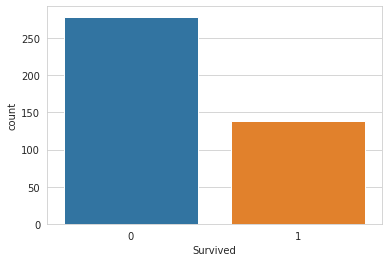

In [378]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=predicted_df)

# **Conclusion**

# We can conclude the following points from the Models:

# 1. The best model to predict the Survival of individuals abord the Titanic is Random Forest Classifier, as it performs very well on Training Dataset.

# 2. After plotting the predicted values (Target) in the Test Data with respect to survival, we can see  that from 418 total number of passengers, around 151 survive and the other 267 dont survive.

